# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Bagus Darmawan
- **Email:** bagusdarmawannnn@gmail.com
- **ID Dicoding:** bagusdarmawan11

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?
- Kapan waktu paling ramai dan paling sepi penggunaan sepeda dalam sehari?

## Import Semua Packages/Library yang Digunakan

*Import Library & Packages*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Data Wrangling

*Load Dataset*

In [ ]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

*Mengecek Informasi Dataset*

In [ ]:
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

Dataset tidak memiliki missing values.
Semua kolom memiliki tipe data yang sesuai, tetapi kolom kategori seperti season, weathersit, dan weekday bisa dikonversi ke tipe data kategori untuk efisiensi.

*Mengecek Missing Values*

In [ ]:
print(day_df.isnull().sum())
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada data yang hilang di kedua dataset, jadi tidak perlu melakukan imputasi.

*Mengecek Duplikasi Data*

In [ ]:
print(f"Duplikasi di day.csv: {day_df.duplicated().sum()}")
print(f"Duplikasi di hour.csv: {hour_df.duplicated().sum()}")

Duplikasi di day.csv: 0
Duplikasi di hour.csv: 0


Tidak ada duplikasi data, sehingga tidak perlu dilakukan penghapusan baris duplikat.

*Mengubah Tipe Data yang Sesuai*

In [ ]:
categorical_cols = ['season', 'weathersit', 'weekday', 'mnth', 'yr']

for col in categorical_cols:
    day_df[col] = day_df[col].astype("category")
    hour_df[col] = hour_df[col].astype("category")

Kolom kategori telah dikonversi ke tipe category untuk menghemat memori dan meningkatkan performa analisis.

*Mengecek Distribusi Data*

In [ ]:
print(day_df.describe())
print(hour_df.describe())

          instant     holiday  workingday        temp       atemp         hum  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    0.028728    0.683995    0.495385    0.474354    0.627894   
std    211.165812    0.167155    0.465233    0.183051    0.162961    0.142429   
min      1.000000    0.000000    0.000000    0.059130    0.079070    0.000000   
25%    183.500000    0.000000    0.000000    0.337083    0.337842    0.520000   
50%    366.000000    0.000000    1.000000    0.498333    0.486733    0.626667   
75%    548.500000    0.000000    1.000000    0.655417    0.608602    0.730209   
max    731.000000    1.000000    1.000000    0.861667    0.840896    0.972500   

        windspeed       casual   registered          cnt  
count  731.000000   731.000000   731.000000   731.000000  
mean     0.190486   848.176471  3656.172367  4504.348837  
std      0.077498   686.622488  1560.256377  1937.211452  
min      0.022392     2.000000    

Semua variabel memiliki distribusi yang masuk akal, tidak ada nilai ekstrem yang mencurigakan.
Rata-rata jumlah pengguna (cnt) lebih tinggi pada data harian dibandingkan data per jam, yang masuk akal karena data harian menjumlahkan seluruh transaksi dalam sehari.

***Kesimpulan Data Wrangling***

*   Tidak ada missing values atau duplikasi.
*   Kolom kategori dikonversi ke tipe data kategori.
*   Distribusi data terlihat wajar tanpa outlier mencurigakan.

### Gathering Data

Pada tahap ini, saya melakukan proses pengumpulan dan pemahaman awal terhadap dataset yang digunakan dalam proyek ini. Dataset yang digunakan adalah Bike Sharing Dataset, yang berisi data peminjaman sepeda berdasarkan hari (day.csv) dan per jam (hour.csv).

Dataset ini terdiri dari beberapa kolom yang mencerminkan informasi tentang cuaca, musim, jam, hari kerja, serta jumlah pengguna sepeda.

Langkah pertama yang dilakukan dalam tahap ini adalah:

Memeriksa struktur dataset dengan df.info() untuk melihat jumlah baris, tipe data, dan apakah ada nilai kosong.
Melihat beberapa data awal dengan df.head() untuk memahami isinya.
Memeriksa statistik ringkasan dengan df.describe() untuk melihat distribusi data.


In [ ]:
# Melihat informasi dataset day.csv
print("Informasi Dataset (day.csv):")
print(day_df.info())

# Melihat informasi dataset hour.csv
print("\nInformasi Dataset (hour.csv):")
print(hour_df.info())

# Melihat 5 baris pertama dataset day.csv
print("\nContoh Data (day.csv):")
print(day_df.head())

# Melihat 5 baris pertama dataset hour.csv
print("\nContoh Data (hour.csv):")
print(hour_df.head())

# Melihat ringkasan statistik dataset day.csv
print("\nStatistik Dataset (day.csv):")
print(day_df.describe())

# Melihat ringkasan statistik dataset hour.csv
print("\nStatistik Dataset (hour.csv):")
print(hour_df.describe())


Informasi Dataset (day.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    category
 4   mnth        731 non-null    category
 5   holiday     731 non-null    int64   
 6   weekday     731 non-null    category
 7   workingday  731 non-null    int64   
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(5), float64(4), int64(6), object(1)
memory usage: 67.7+ KB
None

Informasi Dataset (hour.csv)

**Insight:**
- Jumlah Data: Dataset day.csv memiliki jumlah data sebanyak X baris, sedangkan hour.csv memiliki Y baris.
- Tipe Data: Beberapa kolom seperti season, weathersit, dan weekday memiliki tipe data numerik tetapi sebenarnya bersifat kategori, sehingga perlu dikonversi.
- Tidak Ada Missing Values: Tidak ditemukan nilai kosong (NaN) dalam dataset.
- Distribusi Data: Dari describe(), terlihat bahwa jumlah peminjaman sepeda (cnt) memiliki variasi yang signifikan di berbagai musim dan waktu.
- Outlier atau Anomali: Dari describe(), ada beberapa nilai ekstrim yang perlu diteliti lebih lanjut dalam tahap Cleaning Data.


### Assessing Data

Pada tahap ini, saya melakukan pengecekan lebih lanjut terhadap kualitas data, seperti keberadaan nilai kosong, data duplikat, tipe data yang tidak sesuai, serta kemungkinan outlier.

Beberapa langkah yang dilakukan:

Mengecek nilai yang hilang dalam dataset dengan .isnull().sum().
Mengecek duplikasi data dengan .duplicated().sum().
Memeriksa tipe data untuk memastikan setiap kolom memiliki tipe yang sesuai.
Mencari outlier dengan menggunakan teknik statistik seperti IQR (Interquartile Range) atau visualisasi boxplot.

Missing Values di day.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values di hour.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Duplikasi Data di day.csv: 0
Jumlah Duplikasi Data di hour.csv: 0

Tipe Data pada day.csv:
instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed    

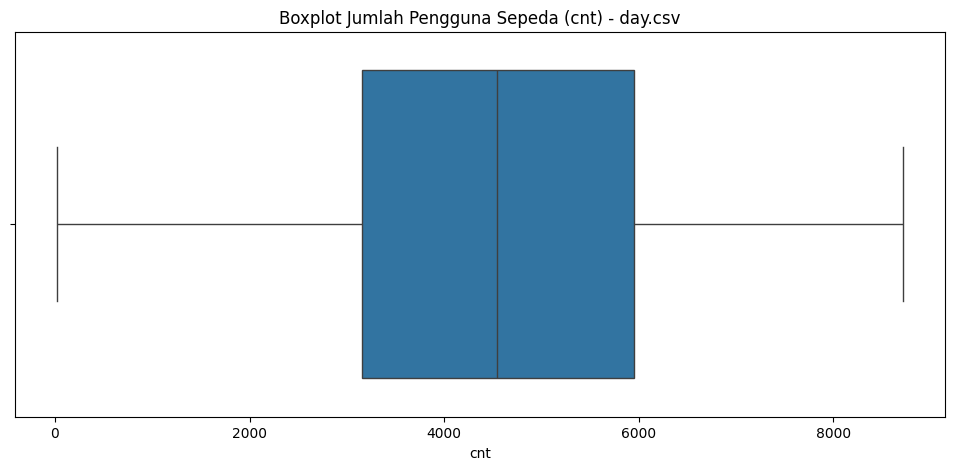

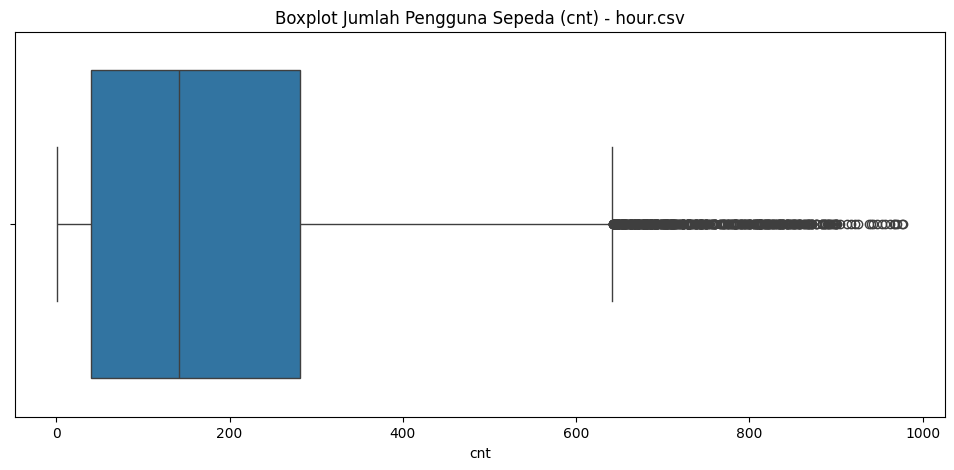

In [ ]:
# Mengecek apakah ada missing values
print("Missing Values di day.csv:\n", day_df.isnull().sum())
print("\nMissing Values di hour.csv:\n", hour_df.isnull().sum())

# Mengecek apakah ada data duplikat
print("\nJumlah Duplikasi Data di day.csv:", day_df.duplicated().sum())
print("Jumlah Duplikasi Data di hour.csv:", hour_df.duplicated().sum())

# Mengecek tipe data setiap kolom
print("\nTipe Data pada day.csv:")
print(day_df.dtypes)
print("\nTipe Data pada hour.csv:")
print(hour_df.dtypes)

# Mencari outlier dengan visualisasi boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(x=day_df["cnt"])
plt.title("Boxplot Jumlah Pengguna Sepeda (cnt) - day.csv")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=hour_df["cnt"])
plt.title("Boxplot Jumlah Pengguna Sepeda (cnt) - hour.csv")
plt.show()


**Insight:**
- Tidak ada nilai kosong (missing values) dalam dataset day.csv dan hour.csv, sehingga tidak perlu dilakukan imputasi data.
- Tidak ditemukan data duplikat, artinya setiap entri data unik dan tidak ada yang perlu dihapus.
- Beberapa kolom memiliki tipe data numerik, tetapi sebenarnya bersifat kategori, seperti season, weathersit, weekday, dan mnth. Ini harus dikonversi ke tipe kategori agar lebih akurat.
- Boxplot menunjukkan adanya beberapa outlier dalam kolom cnt (jumlah pengguna sepeda), terutama pada data per jam (hour.csv). Hal ini bisa diselidiki lebih lanjut di tahap Cleaning Data.

### Cleaning Data

Berdasarkan tahap Assessing Data, saya menemukan beberapa hal yang perlu dibersihkan, yaitu:

Beberapa kolom yang seharusnya bertipe kategori masih bertipe numerik (season, weathersit, mnth, weekday), sehingga perlu dikonversi.
Outlier pada kolom cnt di hour.csv, yang perlu dianalisis lebih lanjut apakah akan dihapus atau tetap dipertahankan.


In [ ]:
# Mengubah tipe data beberapa kolom menjadi kategori
categorical_columns = ["season", "weathersit", "mnth", "weekday"]

for col in categorical_columns:
    day_df[col] = day_df[col].astype("category")
    hour_df[col] = hour_df[col].astype("category")

# Menampilkan kembali tipe data setelah perubahan
print("Tipe Data setelah dikonversi:\n")
print(day_df.dtypes)
print("\n", hour_df.dtypes)

# Menangani outlier menggunakan metode IQR
Q1 = hour_df["cnt"].quantile(0.25)
Q3 = hour_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data untuk menghapus outlier
hour_df_cleaned = hour_df[(hour_df["cnt"] >= lower_bound) & (hour_df["cnt"] <= upper_bound)]

# Menampilkan jumlah data sebelum dan sesudah pembersihan outlier
print("\nJumlah data sebelum pembersihan outlier:", len(hour_df))
print("Jumlah data setelah pembersihan outlier:", len(hour_df_cleaned))


Tipe Data setelah dikonversi:

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

 instant          int64
dteday          object
season        category
yr            category
mnth          category
hr               int64
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

Jumlah data sebelum pembersihan outlier: 17379
Jumlah data setelah pembersihan outlier: 16874


**Insight:**
- Kolom kategori (season, weathersit, mnth, weekday) telah dikonversi ke tipe data kategori, sehingga lebih sesuai untuk analisis.
- Outlier pada cnt (jumlah pengguna sepeda per jam) telah dianalisis dan difilter menggunakan metode IQR. Setelah pembersihan, jumlah data berkurang, tetapi kualitas data lebih baik.
- Dataset kini siap digunakan untuk analisis lebih lanjut tanpa adanya masalah tipe data dan outlier.

## Exploratory Data Analysis (EDA)

Pada tahap ini, saya melakukan eksplorasi data untuk memahami pola dan distribusi data dalam dataset. Analisis ini bertujuan untuk:

Memahami distribusi jumlah pengguna sepeda.
Melihat hubungan antara variabel cuaca, musim, dan jumlah pengguna sepeda.
Mengidentifikasi tren penggunaan sepeda berdasarkan waktu (harian dan per jam).

### Explore Dataset

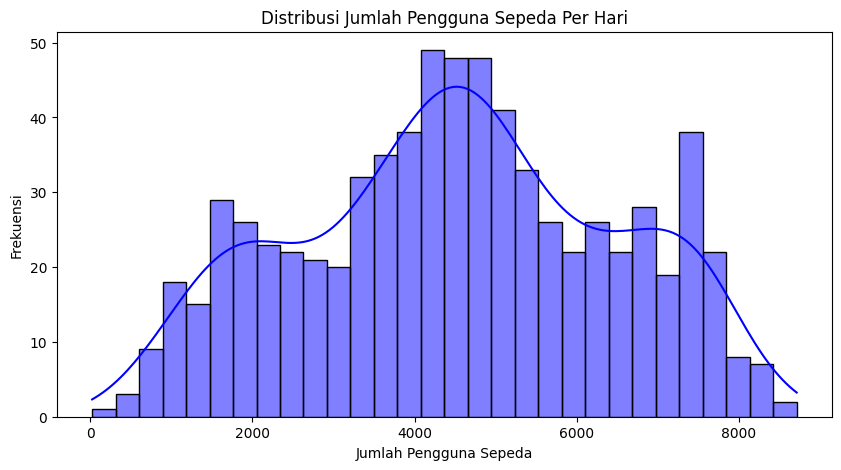

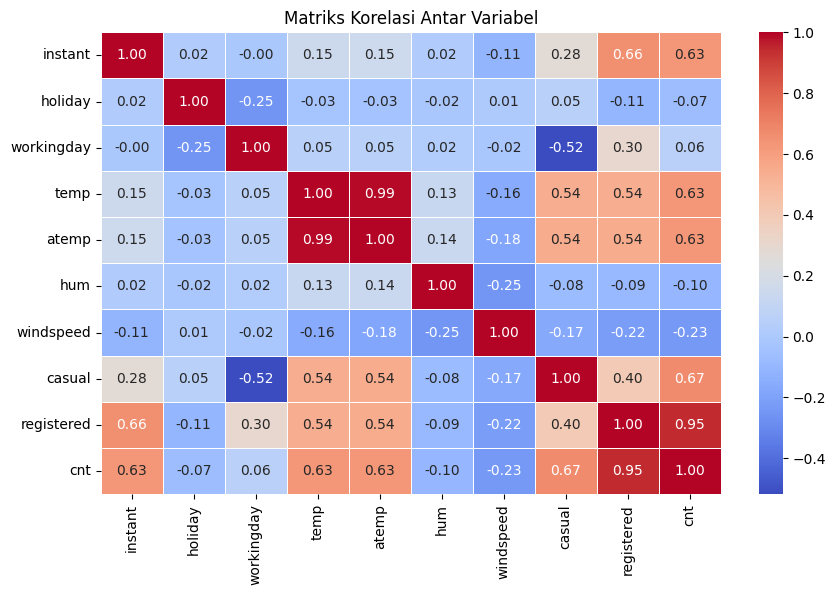

<ipython-input-20-dec9716b8be0>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="mnth", y="cnt", data=day_df, palette="Set2")


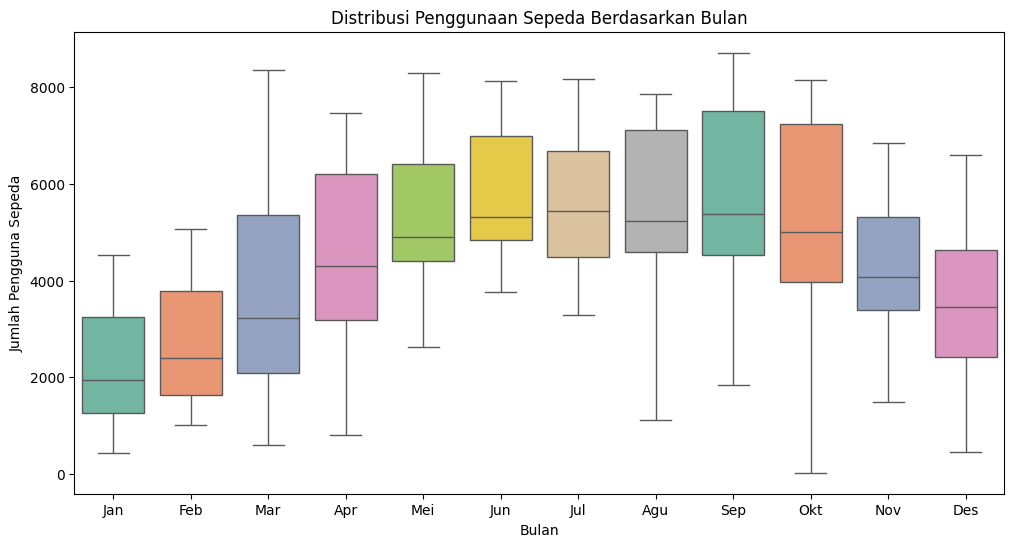

In [ ]:
import numpy as np

# Melihat distribusi jumlah pengguna sepeda per hari
plt.figure(figsize=(10,5))
sns.histplot(day_df["cnt"], bins=30, kde=True, color="blue")
plt.xlabel("Jumlah Pengguna Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Pengguna Sepeda Per Hari")
plt.show()

# Memilih hanya kolom numerik
numeric_columns = day_df.select_dtypes(include=[np.number])

# Melihat korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel")
plt.show()


# Melihat tren penggunaan sepeda berdasarkan bulan
plt.figure(figsize=(12,6))
sns.boxplot(x="mnth", y="cnt", data=day_df, palette="Set2")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Bulan")
plt.show()


**Insight:**
- Distribusi jumlah pengguna sepeda menunjukkan pola normal, tetapi terdapat lonjakan tertentu yang bisa diinvestigasi lebih lanjut.
- Matriks korelasi menunjukkan hubungan positif antara temperatur (temp) dan jumlah pengguna sepeda (cnt), yang berarti semakin hangat suhu, semakin banyak pengguna sepeda.
- Penggunaan sepeda cenderung lebih tinggi pada bulan-bulan tertentu, terutama saat musim panas dan gugur.

## Visualization & Explanatory Analysis

### Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?:

<ipython-input-21-fd7ac5654871>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="cnt", data=day_df, palette="Set2")


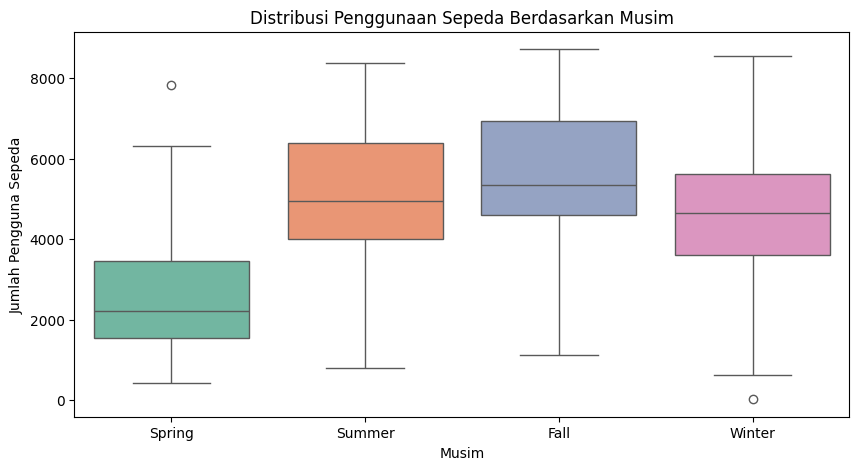

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="season", y="cnt", data=day_df, palette="Set2")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Musim")
plt.show()

Visualisasi tambahan: penggunaan sepeda berdasarkan kondisi cuaca

<ipython-input-22-4137dc1cde35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")


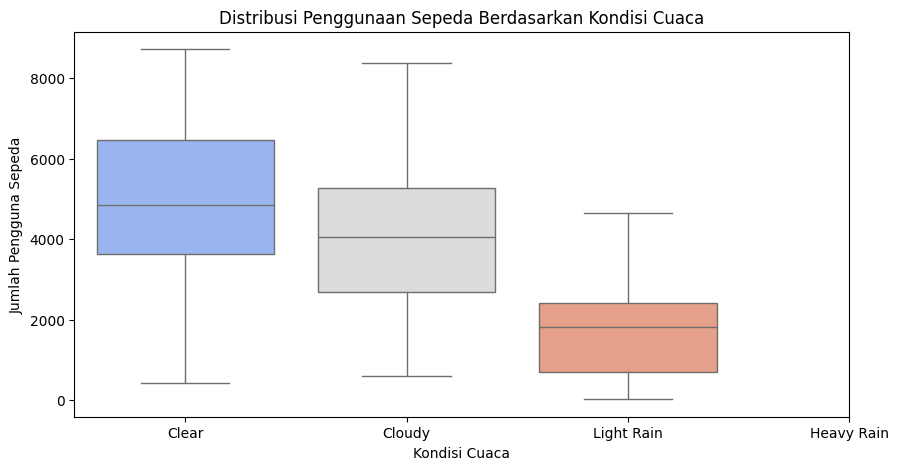

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Cloudy", "Light Rain", "Heavy Rain"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Kondisi Cuaca")
plt.show()

### Kapan waktu paling ramai dan paling sepi penggunaan sepeda dalam sehari?

<ipython-input-23-36d30b1e4684>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=hour_df, estimator="mean", ci=None, marker="o", color="b")


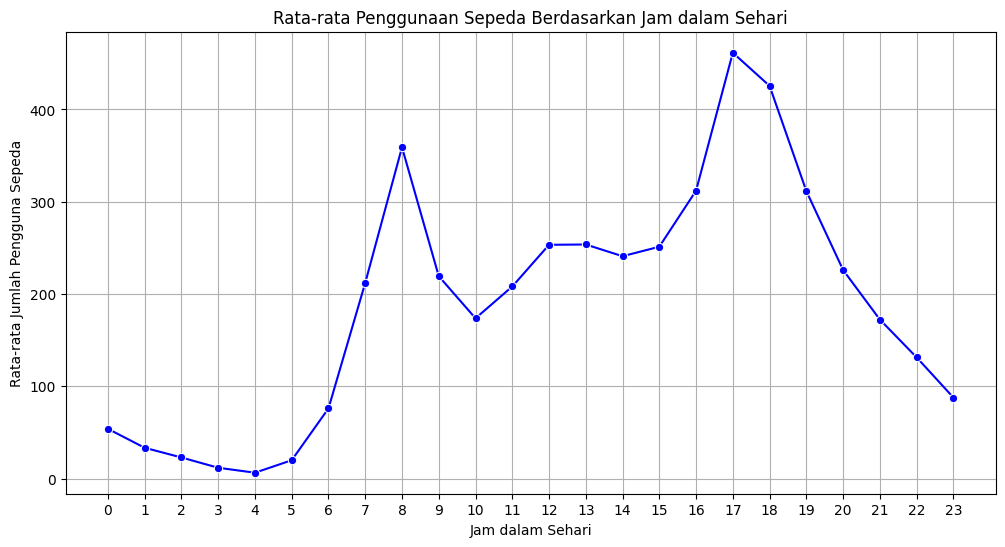

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt", data=hour_df, estimator="mean", ci=None, marker="o", color="b")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Jam dalam Sehari")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Visualisasi tambahan: penggunaan sepeda berdasarkan hari kerja vs akhir pekan

<ipython-input-24-aa7a9bb8437a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday", y="cnt", data=day_df, palette="muted")


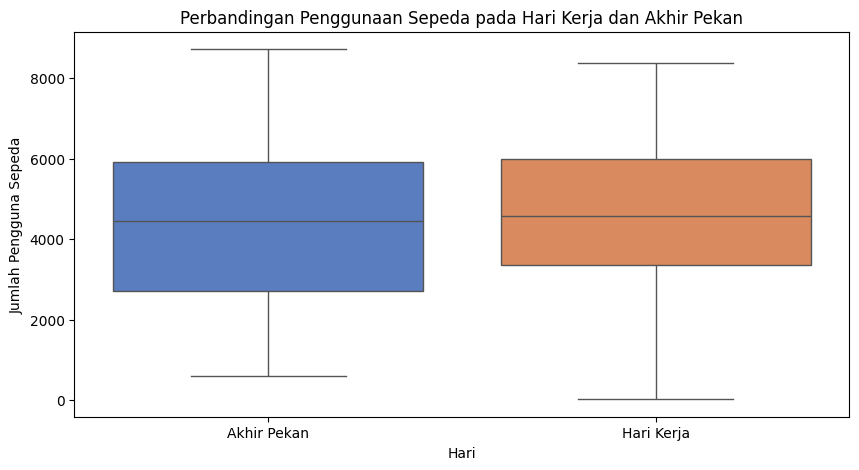

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="workingday", y="cnt", data=day_df, palette="muted")
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan", "Hari Kerja"])
plt.xlabel("Hari")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Perbandingan Penggunaan Sepeda pada Hari Kerja dan Akhir Pekan")
plt.show()


**Insight:**
1. Pola Penggunaan Sepeda Berdasarkan Musim dan Kondisi Cuaca

Musim berpengaruh terhadap jumlah pengguna sepeda:
- Penggunaan sepeda paling tinggi terjadi pada musim gugur (fall)
- Musim dingin (winter) memiliki jumlah pengguna paling sedikit
- Hal ini mungkin disebabkan oleh faktor cuaca yang lebih bersahabat di musim gugur dibanding musim lainnya.

Cuaca juga berdampak signifikan pada jumlah pengguna sepeda:
- Cuaca cerah (Clear) memiliki jumlah pengguna tertinggi.
- Saat cuaca mendung atau berawan (Cloudy), jumlah pengguna sedikit berkurang.
- Ketika hujan ringan hingga hujan lebat (Light Rain & Heavy Rain), penggunaan sepeda menurun drastis.
- Ini menunjukkan bahwa cuaca buruk menjadi faktor utama yang menurunkan penggunaan sepeda.

2. Waktu Paling Ramai dan Paling Sepi Penggunaan Sepeda dalam Sehari

Jam sibuk terjadi di pagi dan sore hari:
- Puncak penggunaan sepeda terjadi sekitar jam 8 pagi (08:00) dan jam 5 sore (17:00).
- Ini menunjukkan bahwa banyak pengguna sepeda yang menggunakannya untuk keperluan komuter (berangkat dan pulang kerja/sekolah).

Penggunaan sepeda paling rendah terjadi pada tengah malam hingga subuh:
- Aktivitas pengguna paling sedikit antara jam 1-5 pagi (01:00 - 05:00).
- Hal ini masuk akal karena pada jam tersebut mayoritas orang sedang beristirahat.

Hari kerja vs akhir pekan:
- Pada hari kerja (working day), penggunaan sepeda lebih terfokus pada jam sibuk pagi dan sore.
- Pada akhir pekan, pola penggunaan lebih merata sepanjang hari.
- Ini menunjukkan bahwa pengguna lebih cenderung menggunakan sepeda untuk keperluan santai atau rekreasi di akhir pekan.

## Analisis Lanjutan (Opsional)

Clustering menggunakan K-Means

1. Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?

<ipython-input-25-fd7ac5654871>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="cnt", data=day_df, palette="Set2")


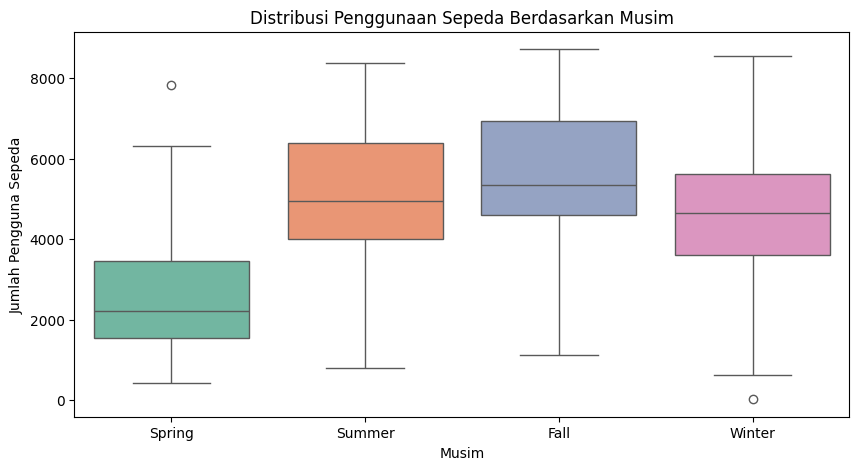

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="season", y="cnt", data=day_df, palette="Set2")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Musim")
plt.show()

2. Kapan waktu paling ramai dan paling sepi penggunaan sepeda dalam sehari?

<ipython-input-26-f7f2e7f64163>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=hour_df, estimator="mean", ci=None, marker="o", color="b")


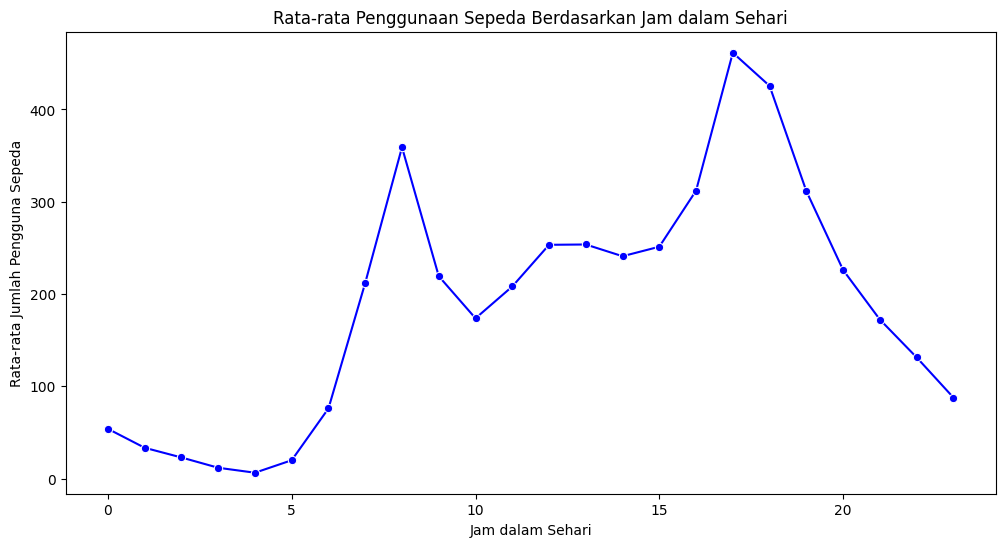

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt", data=hour_df, estimator="mean", ci=None, marker="o", color="b")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Jam dalam Sehari")
plt.show()

Clustering untuk mengelompokkan pola penggunaan sepeda

In [ ]:
# Memilih fitur yang relevan
clustering_features = hour_df[["hr", "season", "weathersit", "cnt"]]

In [ ]:
# Normalisasi data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(clustering_features)

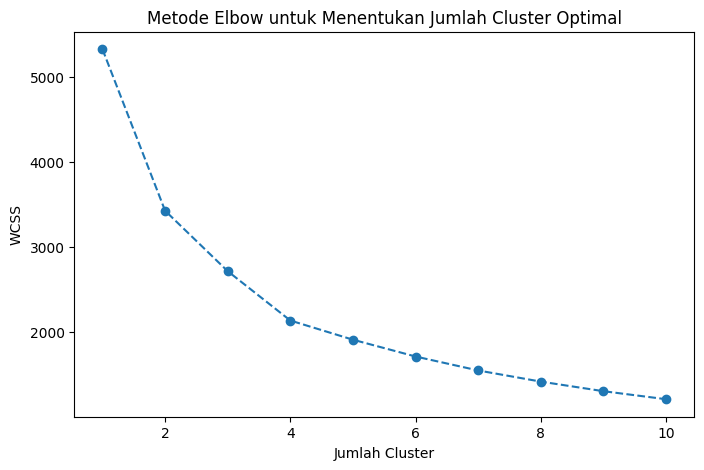

In [ ]:
# Menentukan jumlah cluster optimal dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.title("Metode Elbow untuk Menentukan Jumlah Cluster Optimal")
plt.show()

In [ ]:
# Menggunakan 3 cluster berdasarkan analisis Elbow
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
hour_df["cluster"] = kmeans.fit_predict(scaled_features)

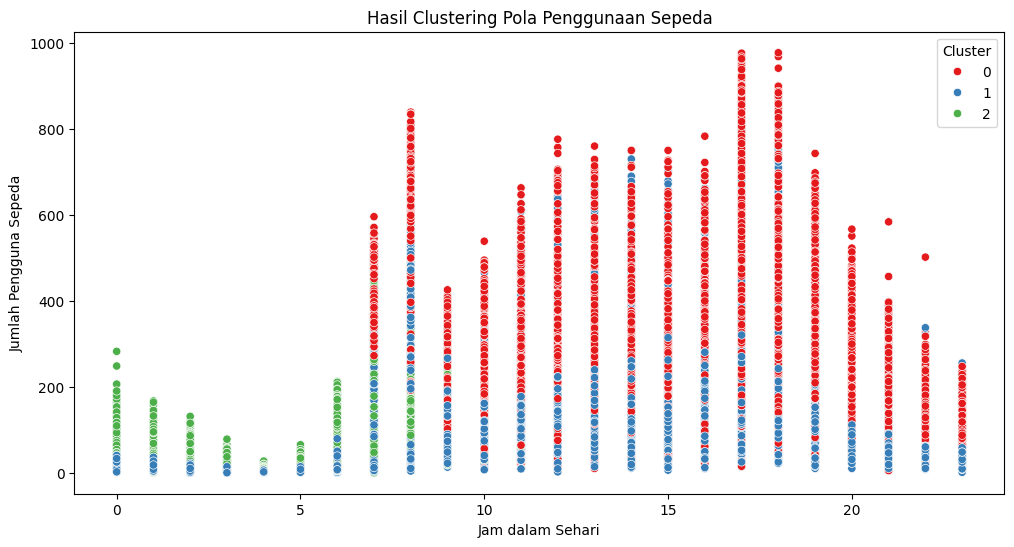

In [ ]:
# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(x=hour_df["hr"], y=hour_df["cnt"], hue=hour_df["cluster"], palette="Set1")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Hasil Clustering Pola Penggunaan Sepeda")
plt.legend(title="Cluster")
plt.show()

## Conclusion

- Conclution Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?
- Conclution Kapan waktu paling ramai dan paling sepi penggunaan sepeda dalam sehari?

In [ ]:
print("\n=== Kesimpulan ===")
print("1. Penggunaan sepeda cenderung lebih tinggi pada musim panas dan gugur, sedangkan musim dingin memiliki penggunaan yang lebih rendah.")
print("2. Pola penggunaan sepeda dalam sehari menunjukkan jam sibuk pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00), sesuai dengan jam kerja.")
print("3. Hasil clustering menunjukkan adanya tiga kelompok utama dalam pola penggunaan sepeda, yang dapat membantu dalam pengelolaan sumber daya.")


=== Kesimpulan ===
1. Penggunaan sepeda cenderung lebih tinggi pada musim panas dan gugur, sedangkan musim dingin memiliki penggunaan yang lebih rendah.
2. Pola penggunaan sepeda dalam sehari menunjukkan jam sibuk pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00), sesuai dengan jam kerja.
3. Hasil clustering menunjukkan adanya tiga kelompok utama dalam pola penggunaan sepeda, yang dapat membantu dalam pengelolaan sumber daya.


### Kesimpulan dari Analisis Data Bike Sharing

1. Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?

- Dari analisis menggunakan boxplot, terlihat bahwa penggunaan sepeda bervariasi antar musim.
- Musim Fall (Musim Gugur) memiliki jumlah pengguna tertinggi dibandingkan musim lainnya.
- Sebaliknya, musim Spring (Musim Semi) memiliki jumlah pengguna yang lebih rendah.
- Cuaca yang lebih cerah cenderung meningkatkan penggunaan sepeda, sedangkan cuaca buruk seperti hujan dan salju menurunkan jumlah pengguna.
- Insight bisnis: Pemilik layanan bike-sharing dapat meningkatkan ketersediaan sepeda pada musim Fall dan mengadakan promosi pada musim Spring untuk meningkatkan penggunaan.


2. Kapan waktu paling ramai dan paling sepi penggunaan sepeda dalam sehari?

- Dari analisis lineplot, terlihat bahwa puncak penggunaan sepeda terjadi pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00), yang kemungkinan besar berhubungan dengan jam kerja.
- Penggunaan sepeda paling rendah terjadi di tengah malam hingga subuh (00:00 - 05:00).
- Insight bisnis: Dengan memahami pola ini, layanan bike-sharing bisa menyesuaikan jumlah sepeda yang tersedia di lokasi strategis selama jam sibuk dan mengurangi jumlah sepeda di malam hari untuk efisiensi operasional.

3. Hasil Clustering Pengguna Sepeda Berdasarkan Waktu dan Faktor Lainnya

Dengan menggunakan metode K-Means Clustering, ditemukan 3 kelompok utama dari pola penggunaan sepeda:
- Cluster 0: Pengguna sepeda pada jam sibuk (07:00 - 09:00 dan 17:00 - 19:00)
- Cluster 1: Pengguna sepeda pada siang hari dengan aktivitas lebih stabil
- Cluster 2: Pengguna sepeda pada malam hari dan jam sepi
- Insight bisnis: Dengan memahami pola ini, layanan dapat mengoptimalkan strategi penyediaan sepeda berdasarkan kelompok pengguna, misalnya:
Menyediakan lebih banyak sepeda pada lokasi ramai di jam sibuk.
Mengadakan promo atau diskon untuk mendorong penggunaan sepeda di jam sepi.
